In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


In [ ]:
df = pd.read_csv("income.csv")
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
df.shape

(22, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


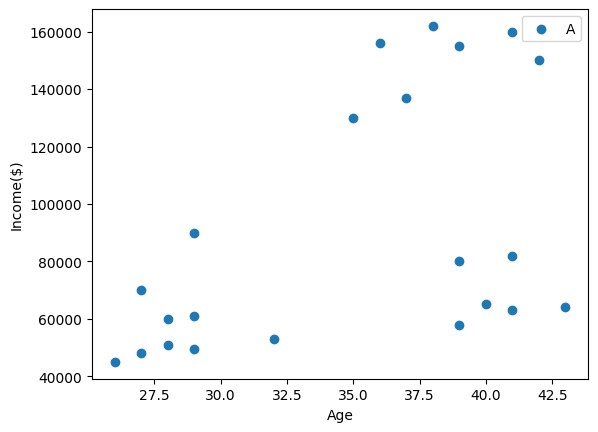

In [ ]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend("Age")
plt.show()

### Here we are specify 3 Clusters

# <h1>**Model Building**

In [ ]:
# model = Algorithm

model = KMeans(n_clusters=3)#,n_init=10) # let us assume we have 3 clusters

# Here we are given x values to predict y values,Age and Income($) as my x because we want to know which one is which group after building a model then it says which one is which group that is my y_prediction

In [ ]:
y_prediction = model.fit_predict(df[['Age','Income($)']])
y_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [ ]:
# Add new column into df DataFrame that is y_prection after clustering the groups
df['Cluster'] = y_prediction

In [ ]:
df.head(22)

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [ ]:
# Group by all clusters
#df.groupby(df['Cluster'])['Name'].count()

In [ ]:
# centroids of the each cluster
model.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [ ]:
model.cluster_centers_[:,0]

array([38.28571429, 32.90909091, 34.        ])

In [ ]:
#df.sort_values(['Cluster','Name','Age','Income($)'],inplace=True)

In [ ]:
# Display by clusters
#df.sort_values(by=['Cluster'], inplace=True)
#df

In [ ]:
#df.reset_index(drop=True)

In [ ]:
df0 = df[df['Cluster']==0]
df0

,Name,Age,Income($),Cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


In [ ]:
df0 = df[df['Cluster']==0]
df1 = df[df['Cluster']==1]
df2 = df[df['Cluster']==2]

In [ ]:
#plt.scatter(df0.Age,df0['Income($)'],color='red')

In [ ]:
model.cluster_centers_[:,0]

array([38.28571429, 32.90909091, 34.        ])

In [ ]:
model.cluster_centers_[:,1]

array([150000.        ,  56136.36363636,  80500.        ])

Text(0, 0.5, 'Income($)')

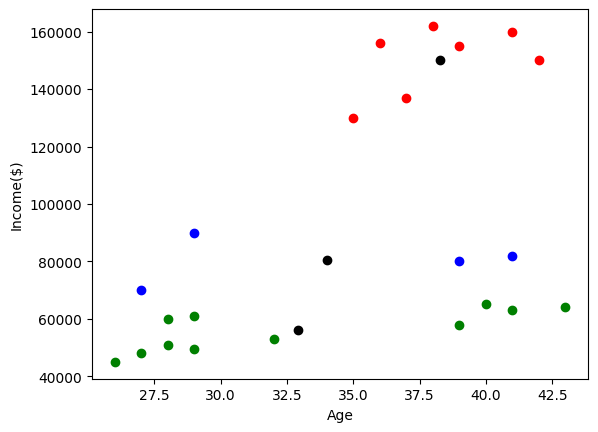

In [ ]:
# Scatter plot
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
# The clusters are imbalencing because we haven't finished scaling.

In [ ]:
# MinMax Scaler

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


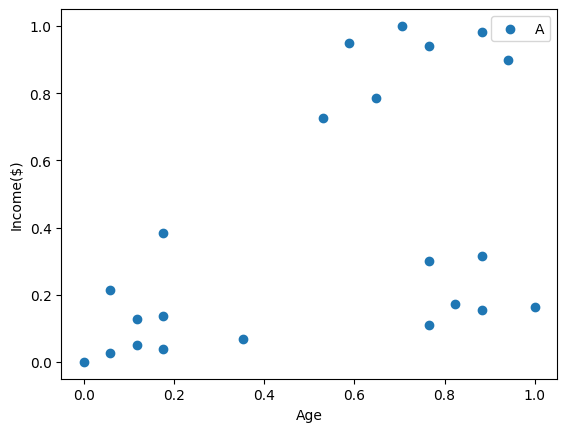

In [ ]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend("Age")
plt.show()

In [ ]:
model = KMeans(n_clusters=3,n_init=10)
y_prediction = model.fit_predict(df[['Age','Income($)']])
y_prediction

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['Cluster'] = y_prediction

In [ ]:
df.head(23)

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


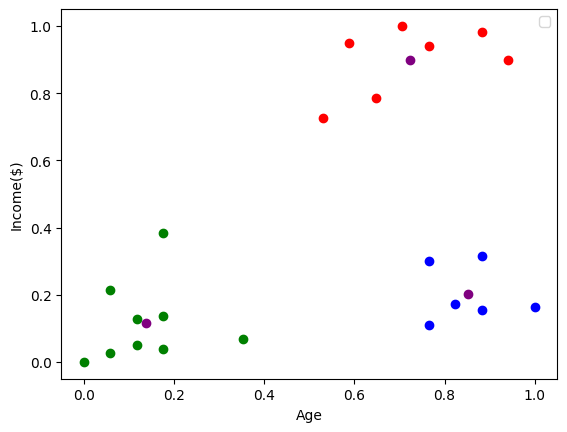

In [ ]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

plt.scatter(df0.Age, df0['Income($)'],color='red')
plt.scatter(df1.Age, df1['Income($)'],color='green')
plt.scatter(df2.Age, df2['Income($)'],color='blue')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='purple')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
# Elbow method
# SUM OF SQUARED ERRORS(SSE)
sse = []
rang = range(1,22)

for k in rang:
  #print(k)
  model  = KMeans(n_clusters = k)
  model.fit(df[['Age','Income($)']])
  sse.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

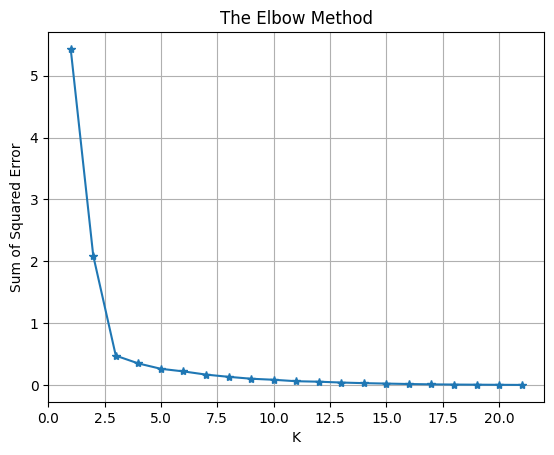

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(rang, sse,marker = '*')
plt.title('The Elbow Method')
#plt.show()
plt.grid()

In [ ]:
# prompt: file,edit,runtime not showing on title bar

!jupyter nbconvert --to notebook --execute "income.ipynb"
